In [1]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
# pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [2]:
# Cargamos el dataframe
df = pd.read_csv('data/train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
df.shape

(240000, 22)

In [4]:
df.head(2)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00


In [5]:
# Veo la cantidad de elementos nulos de cada columna
display(df.isnull().sum())

titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

# Optimizando los tipos de datos
### Integers
<span style="font-weight:600;">Lleno los elementos nulos de tipo tipo float con el valor -1, para que sea un valor valido para la conversion a int, pero al no coincidir con los valores reales de las columnas luego los paso a nan</span>

In [6]:
df[['antiguedad','habitaciones','garages','banos','idzona']] = df[['antiguedad','habitaciones','garages','banos','idzona']].fillna(-1)

<span style="font-weight:600;">Cambio el tipo de todas las columnas que son float y que en verdad se representan en int</span>

In [7]:
df[['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio']] = pd.DataFrame(df, columns=['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio'], dtype=int)

<span style="font-weight:600;">Paso del tipo de dato int64 que se coloco en el paso anterior , y lo downcasteo a el minimo posible para cada columna (int32, int16, etc) , y recupero los datos nulos</span>

In [8]:
df[['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio']] = df[['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio']].apply(pd.to_numeric, downcast='integer').replace(-1, np.nan)

### Floats
<span style="font-weight:600;">Lleno los elementos nulos de tipo tipo float con el valor -1, para que sea un valor valido, pero que sea facil de identificar como valor vacio, al no coincidir con los valores reales de las columnas luego los paso a nan</span>

In [9]:
df[['metroscubiertos','metrostotales']] = df[['metroscubiertos','metrostotales']].fillna(-1)

<span style="font-weight:600;">Downcasteo a el minimo posible para cada columna (float32, float16, etc) y recupero los nulos</span>

In [10]:
df[['metroscubiertos', 'metrostotales']] = df[['metroscubiertos', 'metrostotales']].apply(pd.to_numeric,downcast='float').replace(-1, np.nan)

### Booleans y Category
<span style="font-weight:600;">Cambio el tipo de dato de todas las columnas booleanas a int 1/0 y la columna que se representa como category</span>

In [11]:
df[['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos']] = pd.DataFrame(df, columns=['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos'], dtype=int).apply(pd.to_numeric, downcast='integer')
df = df.astype({'tipodepropiedad': 'category'})

## Resultado
### Tipo de datos final para cada columna

In [12]:
df.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float32
metrostotales                        float32
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                                int8
usosmultiples                           int8
piscina                                 int8
escuelascercanas                        int8
centroscomercialescercanos              int8
precio                                 int32
dtype: obj

### Cantidad de nulos por columna

In [13]:
display(df.isnull().sum())

titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

# Analisis de datos

In [14]:
# Retiro las columnas de "lat" y "lng" dado que en el 50% de los datos estan vacios
# df = df.drop(columns=['lat', 'lng'])

### Ordeno las filas por Fecha , id y precio

In [15]:
df = df.sort_values(by=["fecha","id","precio"])

### Conteo de la cantidad de publicaciones de venta por año

In [16]:
publicacionesXanios = pd.DataFrame(df[['fecha']], columns=['fecha'])
publicacionesXanios = publicacionesXanios["fecha"].groupby(publicacionesXanios['fecha'].dt.year).agg({'count'})
publicacionesXanios

,count
fecha,
2012,23534
2013,30386
2014,40572
2015,51470
2016,94038


### Conteo de la cantidad de publicaciones de venta por provincias

In [17]:
publicacionesXprovincias = pd.DataFrame(df, columns=['provincia'])
publicacionesXprovincias = publicacionesXprovincias["provincia"].groupby(publicacionesXprovincias['provincia']).agg({'count'})
publicacionesXprovincias = publicacionesXprovincias.sort_values(by=["count"])
publicacionesXprovincias.head()

,count
provincia,
Zacatecas,94
Campeche,263
Oaxaca,711
Tlaxcala,839
Tabasco,994


## Llenando valores de metros

#### Busco las filas que tengan "metrostotales" null, pero con valores validos en "metroscubiertos" para llenar los null con el valor de esa segunda columna

In [18]:
print('Cantidad de "metrostotales" nulos ' + str(df['metrostotales'].isnull().sum()))
nullosLimpiables = df[ df['metrostotales'].isnull() & df['metroscubiertos'].notnull()]
coincidencias = nullosLimpiables.shape[0]
print('Cantidad de "metrostotales" a los que se puede asignar nuevos valores: ' + str(coincidencias))

Cantidad de "metrostotales" nulos 51467
Cantidad de "metrostotales" a los que se puede asignar nuevos valores: 51467


#### Encontre valores validos para todas las filas y procedo a hacer el reemplazo

In [19]:
df['metrostotales'] = np.where(df['metrostotales'].isnull() & df['metroscubiertos'].notnull(), df['metroscubiertos'], df['metrostotales'])
print('Cantidad de "metrostotales" nulos ' + str(df['metrostotales'].isnull().sum()))

Cantidad de "metrostotales" nulos 0


### Repito el proceso pero ahora al contrario

In [20]:
print('Cantidad de "metroscubiertos" nulos ' + str(df['metroscubiertos'].isnull().sum()))
nullosLimpiables = df[ df['metroscubiertos'].isnull() & df['metrostotales'].notnull()]
coincidencias = nullosLimpiables.shape[0]
print('Cantidad de "metroscubiertos" a los que se puede asignar nuevos valores: ' + str(coincidencias))

Cantidad de "metroscubiertos" nulos 17400
Cantidad de "metroscubiertos" a los que se puede asignar nuevos valores: 17400


#### Encontre valores validos para todas las filas y procedo a hacer el reemplazo

In [21]:
df['metroscubiertos'] = np.where(df['metroscubiertos'].isnull() & df['metrostotales'].notnull(), df['metrostotales'], df['metroscubiertos'])
print('Cantidad de "metroscubiertos" nulos ' + str(df['metroscubiertos'].isnull().sum()))

Cantidad de "metroscubiertos" nulos 0


### V2

In [22]:
metrosNull = df.copy()
metrosNull['totalesNull'] = np.where(metrosNull['metrostotales'].isnull(), True, False)
metrosNull['cubiertosNull'] = np.where(metrosNull['metroscubiertos'].isnull(), True, False)

In [23]:
tipoTotalesNull = pd.DataFrame(metrosNull[metrosNull['totalesNull'] == True], columns=['tipodepropiedad'])
tipoTotalesNull = tipoTotalesNull["tipodepropiedad"].groupby(tipoTotalesNull['tipodepropiedad']).agg({'count'})
tipoTotalesNull = tipoTotalesNull[ tipoTotalesNull['count'] > 0].sort_values(by=["count"], ascending = False)
tipoTotalesNull.head()

,count
tipodepropiedad,


### Veo que tipo de propiedades tienen el valor de "metrostotales" en null (pero tienen valor en "metroscubiertos" ), dado que si es algo del tipo "Edificio" puedo suponer que el mismo numero de metros cubiertos corresponde a metros totales, o en el caso opuesto de la categoria "Terreno" no tiene sentido tiene metros cubiertos en esa categoria y los metros totales son nulos , asique teniendo en cuenta que no son muchos casos , decido tirar la fila para esta parte del analisis.

In [24]:
#DROPEO LAS FILAS DE CON TIPO DE PROPIEDAD "Terreno" , "Terreno comercial" Y "Huerta"
#metrosNull = metrosNull[metrosNull['tipodepropiedad'] != 'Terreno' & metrosNull['totalesNull'] == True]
#metrosNull = metrosNull[metrosNull['tipodepropiedad'] != 'Terreno comercial' & metrosNull['totalesNull'] == True]
#metrosNull = metrosNull[metrosNull['tipodepropiedad'] != 'Huerta' & metrosNull['totalesNull'] == True]

In [25]:
#mtotalesnull.shape

NameError: name 'mtotalesnull' is not defined

In [26]:
df['metrostotales'] = np.where(df['metrostotales'].isnull() & df['metroscubiertos'].notnull(), df['metroscubiertos'], df['metrostotales'])
print('Cantidad de "metrostotales" nulos ' + str(df['metrostotales'].isnull().sum()))

Cantidad de "metrostotales" nulos 0


In [28]:
#tipoCubiertosNull = pd.DataFrame(mcubiertosnull, columns=['tipodepropiedad'])
#tipoCubiertosNull = tipoCubiertosNull["tipodepropiedad"].groupby(tipoCubiertosNull['tipodepropiedad']).agg({'count'})
#tipoCubiertosNull = tipoCubiertosNull[ tipoCubiertosNull['count'] > 0].sort_values(by=["count"], ascending = False)
#tipoCubiertosNull

### Veo que tipo de propiedades tienen el valor de "metroscubiertos" en null (pero tienen valor en "metrostotales" ), dado que si es algo del tipo "Edificio" puedo suponer que el mismo numero de metros totales corresponde a metros cubiertos, o en el caso opuesto de la categoria "Terreno" se supondra un valor 0 metros cubiertos para esta parte del analisis.

In [29]:
test = df.loc[df['tipodepropiedad'] == 'Terreno', ['metroscubiertos','metrostotales']]
test = test.dropna()

In [30]:
test.shape

(9945, 2)

In [31]:
test['diff'] = test['metrostotales'] - test['metroscubiertos']
test['diff'].value_counts()

0.00       9350
150.00       16
100.00       10
110.00       10
140.00        9
180.00        9
80.00         9
40.00         8
120.00        7
170.00        7
200.00        7
270.00        6
216.00        6
220.00        6
50.00         6
250.00        6
65.00         5
49.00         5
84.00         5
160.00        5
-50.00        5
70.00         4
145.00        4
139.00        4
230.00        4
90.00         4
125.00        4
-60.00        4
190.00        4
20.00         4
           ... 
-94.00        1
287.00        1
54.00         1
290.00        1
35.00         1
98.00         1
-158.00       1
-186.00       1
-70.00        1
283.00        1
-9.00         1
77.00         1
247.00        1
186.00        1
174.00        1
292.00        1
83.00         1
274.00        1
193.00        1
310.00        1
329.00        1
273.00        1
-47.00        1
-33.00        1
-45.00        1
348.00        1
-113.00       1
-83.00        1
148.00        1
263.00        1
Name: diff, Length: 304,

In [32]:
test['diff'] = test['diff'].apply(lambda x: -1 if x != 0 else 0)
test['diff']

id
130326    0
55820     0
88581     0
25886     0
194677    0
137027    0
212380    0
257028    0
287483    0
138092    0
148683    0
160479    0
245761    0
268737    0
45829     0
95422     0
247532    0
18070     0
94673     0
17487     0
29167     0
41687     0
80647     0
141118    0
146980    0
191985    0
287627    0
168088    0
70268     0
147876    0
         ..
111977    0
112068    0
127210    0
131112    0
134488    0
135744    0
136675    0
137076    0
138316    0
144880    0
145512    0
152303    0
164593    0
172264   -1
176563    0
177142    0
186495    0
195889    0
196202    0
212092    0
218773    0
229941    0
229992    0
255440    0
257544    0
272656    0
273003    0
291247    0
293275    0
295585    0
Name: diff, Length: 9945, dtype: int64

In [33]:
test.shape

(9945, 3)

In [34]:
df['provincia'].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [47]:
Noroeste = ['Baja California Norte', 'Baja California Sur','Chihuahua', 'Durango', 'Sinaloa', 'Sonora']
Noreste = ['Coahuila','Nuevo León', 'Tamaulipas']
Oeste = ['Colima', 'Jalisco', 'Michoacán', 'Nayarit']
Este = ['Hidalgo', 'Puebla', 'Tlaxcala', 'Veracruz']
Centronorte = ['Aguascalientes', 'Guanajuato', 'Querétaro', 'San luis Potosí', 'Zacatecas']
Centrosur = ['Edo. de México', 'Distrito Federal', 'Morelos']
Suroeste = ['Chiapas', 'Guerrero', 'Oaxaca']
Sureste = ['Campeche', 'Quintana Roo', 'Tabasco', 'Yucatán']

In [38]:
df['alNorte'] = df['provincia'].apply(lambda x: 1 if x in provinciasNorte else 0 )

In [46]:
df.groupby(['alNorte']).agg({'precio':'mean'})

,precio
alNorte,
0,2676793.94
1,1551100.03


In [49]:
def region(provincia):
    if(provincia in Noroeste):
        return 'Noroeste'
    if(provincia in Noreste):
        return 'Noreste'
    if(provincia in Oeste):
        return 'Oeste'
    if(provincia in Este):
        return 'Este'
    if(provincia in Centronorte):
        return 'Centronorte'
    if(provincia in Centrosur):
        return 'Centrosur'
    if(provincia in Suroeste):
        return 'Suroeste'
    return 'Sureste'

In [53]:
df['region'] = df['provincia'].apply(region)
df = df.astype({'region': 'category'})

In [63]:
df.groupby(['region']).agg({'precio':'mean'}).sort_values('precio', ascending = False)

,precio
region,
Centrosur,3117324.11
Noreste,2385799.88
Suroeste,2239709.74
Oeste,2202275.16
Sureste,2180047.40
Centronorte,2014186.84
Este,1997588.50
Noroeste,1368329.94


In [110]:
#df.groupby(['region']).agg({'precio':'sum'}).sort_values('precio', ascending = False)
reg_ne.head()

id
103293   7200000.00
90071     490000.00
129818   1340000.00
97918     850000.00
257302    750000.00
Name: precio, dtype: float64

In [109]:
reg_cs = df[ df['region'] == 'Centrosur']['precio']
reg_cn = df[ df['region'] == 'Centronorte']['precio']
reg_o = df[ df['region'] == 'Oeste']['precio']
reg_ne = df[ df['region'] == 'Noreste']['precio']
reg_e = df[ df['region'] == 'Este']['precio']
reg_se = df[ df['region'] == 'Sureste']['precio']
reg_no = df[ df['region'] == 'Noroeste']['precio']
reg_so = df[ df['region'] == 'Suroeste']['precio']

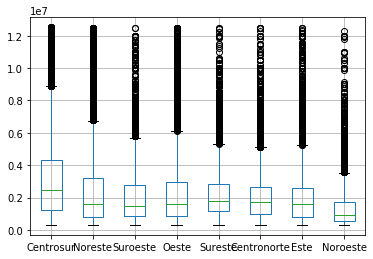

In [111]:
data = {'Centronorte':reg_cn,'Centrosur':reg_cs, 'Oeste':reg_o, 'Noreste':reg_ne, 'Este':reg_e, 'Sureste':reg_se, 'Noroeste':reg_no, 'Suroeste':reg_so}
precioXregion = pd.DataFrame(data, columns=['Centronorte','Centrosur','Noreste','Noroeste', 'Oeste', 'Este','Sureste', 'Suroeste' ])
precioXregion.boxplot(column=['Centrosur', 'Noreste', 'Suroeste', 'Oeste', 'Sureste', 'Centronorte', 'Este', 'Noroeste'])  # Plot specific columns


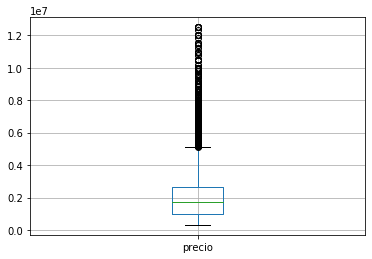

In [81]:
reg_cn['precio'].to_frame().boxplot()